SVM - Support Vector Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#Data collection and Processing
loan_data = pd.read_csv("./loan_price_dataset.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Number of rows and Columns
loan_data.shape

(614, 13)

In [4]:
# Statistical measure
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Number of missing Values 
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Data Cleaning - Dropping the missing values
loan_data = loan_data.dropna()
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
# Label Encoding
# Label values are Y and N
# Yes = 1
# No = 0
# For easy Processing
loan_data.replace({"Loan_Status":{'N':0,'Y':1}}, inplace=True)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [8]:
# Dependent Column Values
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [9]:
# Replace all the 3+ values with 4
loan_data = loan_data.replace(to_replace = '3+', value = 4)
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

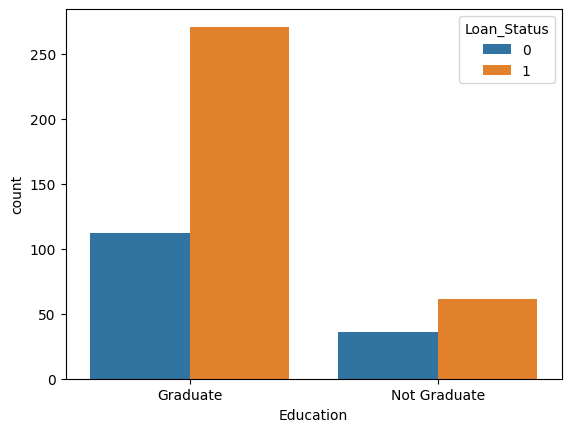

In [10]:
# Visualize the Data
# Education and Loan_Status
# PLot the values of loan_Status and Education

sns.countplot(x='Education', hue='Loan_Status', data = loan_data)

<Axes: xlabel='Married', ylabel='count'>

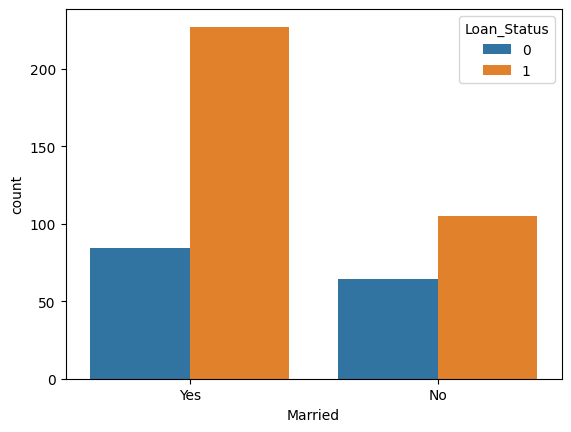

In [11]:
#Mariatal_Status and Loan_Status
sns.countplot(x='Married', hue='Loan_Status', data = loan_data)

<Axes: xlabel='Self_Employed', ylabel='count'>

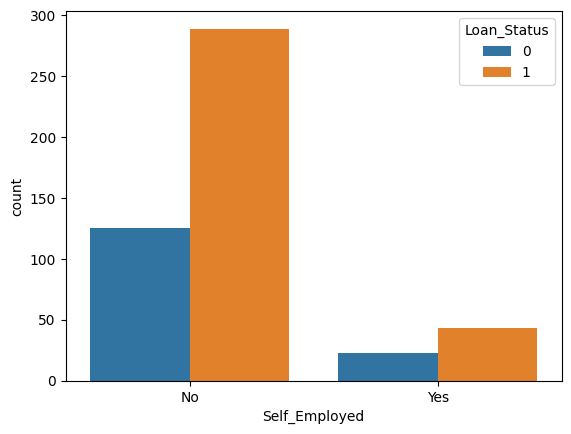

In [12]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data = loan_data)

<Axes: xlabel='Gender', ylabel='count'>

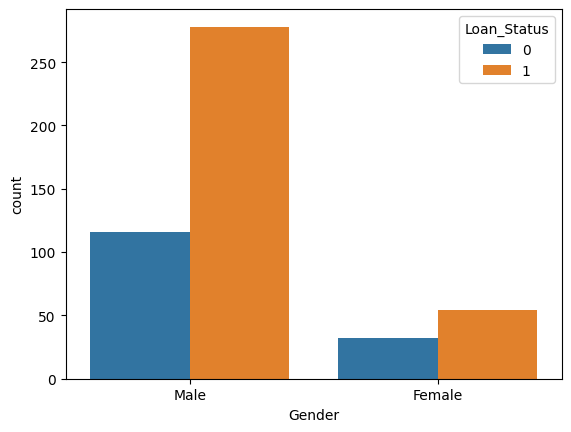

In [13]:
sns.countplot(x='Gender', hue='Loan_Status', data = loan_data)

In [14]:
# Replacing all the textual data into numerical values

loan_data.replace({'Married':{'No':0, 'Yes':1}, 
'Education':{'Graduate':1, 'Not Graduate':0},
'Self_Employed':{'No':0, 'Yes':1},
'Gender':{'Male':1, 'Female': 0},
'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban': 2}},
inplace=True)

In [15]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [16]:
# Seprating the data and Label
X = loan_data.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
Y = loan_data['Loan_Status']

print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.1,stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (48, 11) (432, 11)


In [19]:
#Training the Model: SVM Support Vector Machine Model
classifier = svm.SVC(kernel='linear')

In [20]:
# Training the svm Model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [21]:
# Accuracy score
X_train_prediction = classifier.predict(X_train)
training_data_Accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score for training Data: ',training_data_Accuracy)

Accuracy score for training Data:  0.6666666666666666


In [22]:
X_test_prediction = classifier.predict(X_test)
testing_data_Accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score for Testing Data:',testing_data_Accuracy)

Accuracy score for Testing Data: 0.6342592592592593
